### 생선 분류
 - 데이터셋 : fish.csv
 - 피쳐/특성 : Weight, Length
 - 타겟/라벨 : Species
 - 학습 방법 : 지도학습 => 분류
 - 학습알고리즘 : 최근접이웃알고리즘
 - 하이퍼파라미터 튜닝 : 모델 성능 개선

[1] 데이터 준비

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FILE = '../data/fish.csv'

In [4]:
# 행 : Bream, Smelt,  컬럼 :  Species, Weight, Height => 0, 1, 2
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [5]:
mask =(fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twoDF=fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [6]:
# Species 컬럼을 수치화  => Bream 0, Smelt 1
new_cols=twoDF.loc[:, 'Species'].replace({'Bream':0, 'Smelt':1})
twoDF['FCode'] = new_cols

C:\Users\kjy19\AppData\Local\Temp\ipykernel_25912\1978998237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode'] = new_cols


In [7]:
twoDF.head(3)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0


[2] 피쳐와 타겟 분리

In [8]:
features=twoDF[['Weight','Length']]
target=twoDF['FCode']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target=> {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target=> (49,), 1D


In [43]:
# Self
# target

[3] 데이터셋 준비 => 학습용, 테스트용

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=10)

In [11]:
# train:test = 80:20 체크
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'X_test  : {X_test.shape}, {X_test.ndim}D')
print(f'y_test  : {y_test.shape}, {y_test.ndim}D')

X_train : (39, 2), 2D
y_train : (39,), 1D
X_test  : (10, 2), 2D
y_test  : (10,), 1D


In [12]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0] , y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [13]:
y_test.value_counts()[0]/y_test.shape[0] , y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [16]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [17]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [18]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [19]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [22]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [23]:
# 학습 후 모델 파라미터
model.classes_ , model.n_samples_fit_
# model.feature_names_in_,   <== ndarray일 경우 컬럼명 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [24]:
model.score(X_test_scaled, y_test)

1.0

[6] 최적의 k 개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
 - 하이퍼파라미터

In [39]:
# K의 범위 : 1 ~ 전체 데이터 개수

scores, points = [], []
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    # model = KNeighborsClassifier(n_neighbors=k)
    model.n_neighbors = k
    # 

    # 모델 예측 값 추출
    model.fit(X_train_scaled, y_train)

    # 점수 계산
    jumsu = model.score(X_test_scaled, y_test)
    # print(f'jumsu => {jumsu}')
    if k>1:
        if jumsu != scores[-1]: points.append(k)
    scores.append(jumsu)


In [ ]:
scores = []
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    model = KNeighborsClassifier(n_neighbors=k)
    # model.n_neighbors = k
    # 

    # 모델 예측 값 추출
    # model.fit(X_train_scaled, y_test)

    # 점수 계산
    jumsu = model.score(X_test_scaled, y_train)
    print(f'jumsu => {jumsu}')

    scores.append(k)

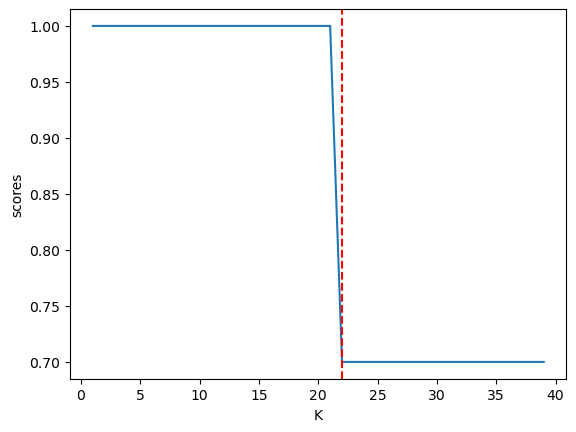

In [40]:
plt.plot(range(1,40), scores)
plt.xlabel('K')
plt.ylabel('scores')
plt.axvline(points[0],0.0, 1.0, color='red', linestyle='dashed')
plt.show()

In [ ]:
new_data_scaled=mmScaler.transform(new_data)
new_data_scaled

array([[0.40904057, 0.57692308]])

In [ ]:
# 임의의 새로운 데이터의 예측
model.predict(new_data_scaled)

array([0], dtype=int64)

In [ ]:
### 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(new_data_scaled)

In [ ]:
neighbors=index.reshape(-1).tolist()
neighbors

([25, 22, 21, 0, 6],
    Species  Weight  Length  FCode
 25   Bream   725.0    35.0      0
 22   Bream   620.0    34.5      0
 21   Bream   685.0    34.0      0
 0    Bream   242.0    25.4      0
 6    Bream   500.0    29.7      0)

In [ ]:
X_train_scaled[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [ ]:
k_weight=X_train_scaled[neighbors][:,0]
k_length=X_train_scaled[neighbors][:,1]

print(new_data_scaled)
print(k_weight, k_length, sep='\n')

[[0.40904057 0.57692308]] [[0.40904057 0.57692308]
 [0.40904057 0.57692308]]
[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


In [ ]:
new_data_scaled[0,0], new_data_scaled[0,1]

(0.4090405718312696, 0.5769230769230771)

In [ ]:
X_train_scaled[:,0], X_train_scaled[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

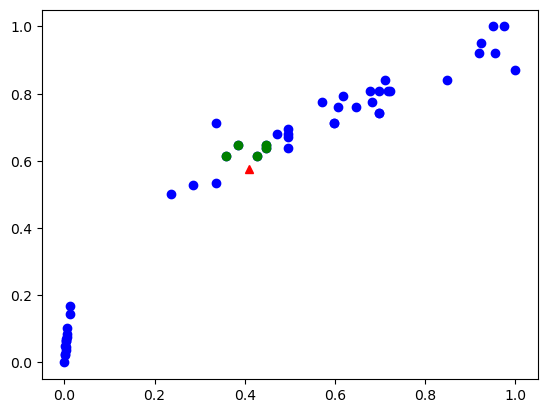

In [ ]:
### 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream,Smelt 분류 가능함
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c='blue')
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c='blue')
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'r^')
plt.scatter(k_weight, k_length,c='green')
plt.show()